In [61]:
from torch.utils.data import DataLoader, Dataset
import torch

class Data(Dataset):
    def __init__(self):
        self.X = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.Y = -3 * self.X + 1
        self.Y = self.Y + 0.5 * torch.randn(self.Y.size())
        self.len = self.X.shape[0]
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len

dataset = Data()

In [62]:
dataset[0]

(tensor([-3.]), tensor([10.7302]))

In [63]:
from torch import nn

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_features=input_size, out_features=output_size)
    def forward(self, x):
        return self.linear(x)

In [64]:
criterion = nn.MSELoss()

In [65]:
train_loader = DataLoader(dataset, batch_size=5)

In [66]:
model = LR(1, 1)

In [67]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [68]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [0, 1]}]}

In [69]:
for epoch in range(15):
    for x, y in train_loader:
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

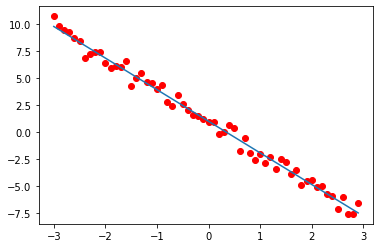

In [70]:
import matplotlib.pyplot as plt

plt.plot(dataset[:][0], dataset[:][1], "ro")
plt.plot(dataset[:][0], model(dataset[:][0]).detach())